In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\EDA DATA ANALYSIS\used_car_dataset.csv")
print(df.head())

           Brand      model  Year  Age     kmDriven Transmission   Owner  \
0          Honda       City  2001   23    98,000 km       Manual  second   
1         Toyota     Innova  2009   15  190000.0 km       Manual  second   
2     Volkswagen  VentoTest  2010   14    77,246 km       Manual   first   
3  Maruti Suzuki      Swift  2017    7    83,500 km       Manual  second   
4  Maruti Suzuki     Baleno  2019    5    45,000 km    Automatic   first   

  FuelType PostedDate                                       AdditionInfo  \
0   Petrol     Nov-24  Honda City v teck in mint condition, valid gen...   
1   Diesel     Jul-24  Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...   
2   Diesel     Nov-24  Volkswagen Vento 2010-2013 Diesel Breeze, 2010...   
3   Diesel     Nov-24     Maruti Suzuki Swift 2017 Diesel Good Condition   
4   Petrol     Nov-24       Maruti Suzuki Baleno Alpha CVT, 2019, Petrol   

     AskPrice  
0  ₹ 1,95,000  
1  ₹ 3,75,000  
2  ₹ 1,84,999  
3  ₹ 5,65,000  
4  ₹ 6

In [4]:
info=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [5]:
df.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [6]:
df = df.drop('AdditionInfo',axis=1)

In [7]:
datatype=df.dtypes
print(datatype)

Brand           object
model           object
Year             int64
Age              int64
kmDriven        object
Transmission    object
Owner           object
FuelType        object
PostedDate      object
AskPrice        object
dtype: object


In [8]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AskPrice'],
      dtype='object')

In [9]:
#CHECKING FOR NULL VALUES
Null_values=df.isnull().sum()
print(Null_values)

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AskPrice         0
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Brand           0
model           0
Year            0
Age             0
kmDriven        0
Transmission    0
Owner           0
FuelType        0
PostedDate      0
AskPrice        0
dtype: int64

In [12]:
df['kmDriven']= df['kmDriven'].str.replace(',','').str.replace('km','').str.replace(".",'')

In [13]:
df['kmDriven'].unique()

array(['98000 ', '1900000 ', '77246 ', ..., '243000 ', '43700 ', '83228 '],
      dtype=object)

In [14]:
df['AskPrice']=df['AskPrice'].str.replace('₹','').str.replace(',','').astype('int')

In [15]:
df['AskPrice'].unique()

array([  195000,   375000,   184999, ...,   345111,   335999, 13600000])

In [16]:
df['PostedDate']= pd.to_datetime(df['PostedDate'], format='%b-%y', errors='coerce') 

In [17]:
dates = df['PostedDate'].unique()
print(dates)

<DatetimeArray>
['2024-11-01 00:00:00', '2024-07-01 00:00:00', '2024-10-01 00:00:00',
 '2024-08-01 00:00:00', '2024-09-01 00:00:00', '2024-05-01 00:00:00',
 '2024-06-01 00:00:00', '2024-04-01 00:00:00', '2024-01-01 00:00:00',
 '2024-02-01 00:00:00', '2023-12-01 00:00:00', '2024-03-01 00:00:00']
Length: 12, dtype: datetime64[ns]


In [19]:
correlation_matrix = df[['Year', 'Age', 'kmDriven', 'AskPrice']].corr()
print(correlation_matrix)


              Year       Age  kmDriven  AskPrice
Year      1.000000 -1.000000 -0.114687  0.304350
Age      -1.000000  1.000000  0.114687 -0.304350
kmDriven -0.114687  0.114687  1.000000 -0.020791
AskPrice  0.304350 -0.304350 -0.020791  1.000000


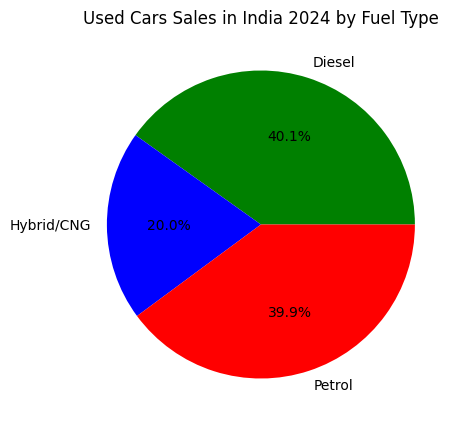

In [32]:
#DATA VISUALIZATION
df_fueltype = df.groupby('FuelType').size()
df_fueltype.plot.pie(figsize=(5, 5), autopct = '%1.1f%%', colors=["green", "blue", "red"])
plt.title('Used Cars Sales in India 2024 by Fuel Type')
plt.show()

<Axes: title={'center': 'Number of Cars by Brand'}, xlabel='Brand'>

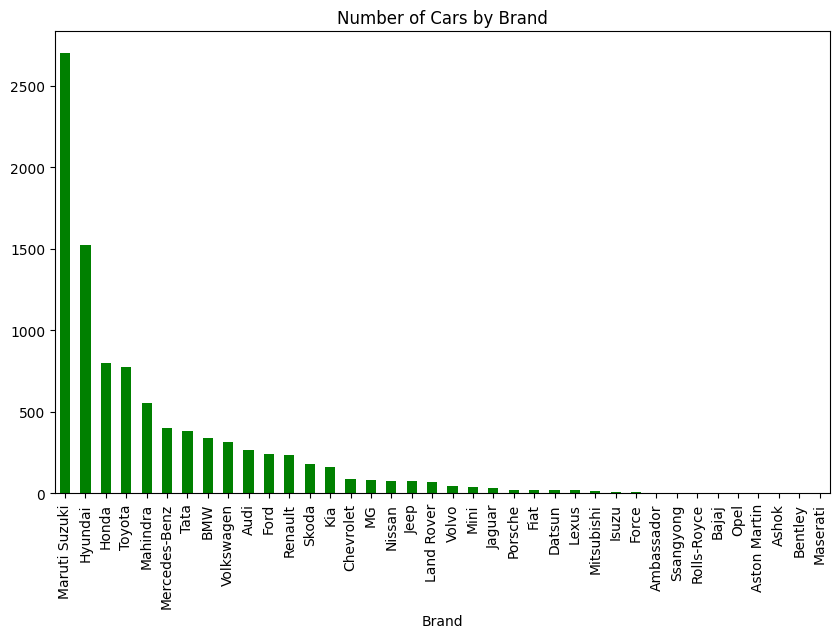

In [33]:
df['Brand'].value_counts().plot(kind='bar', figsize=(10, 6), color='green',title="Number of Cars by Brand")


<Axes: title={'center': 'Car Postings Over Time'}, xlabel='PostedDate'>

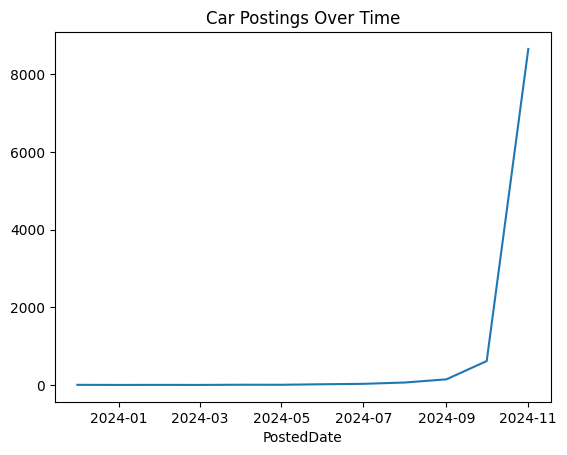

In [34]:
df['PostedDate'] = pd.to_datetime(df['PostedDate'])  
df.groupby(df['PostedDate'].dt.date).size().plot(kind='line', title="Car Postings Over Time")


In [35]:
current_year = 2025
df['Age'] = current_year - df['Year']


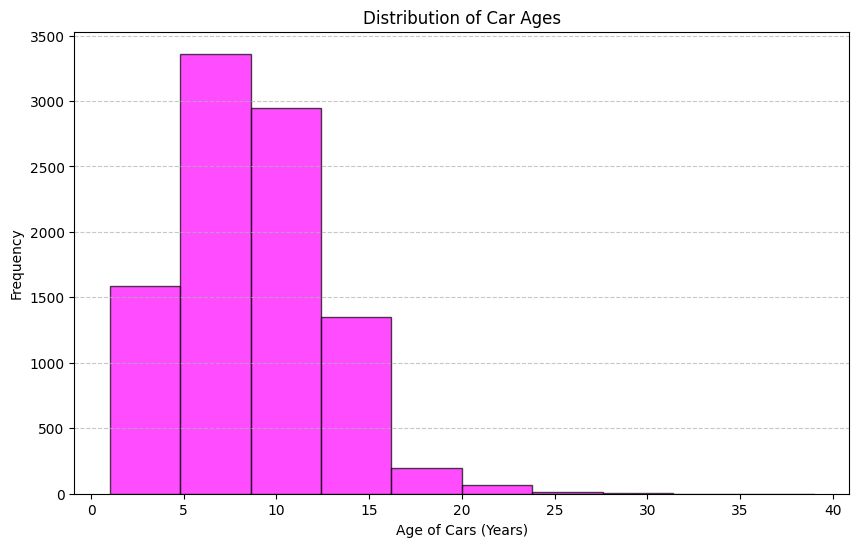

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='magenta', edgecolor='black', alpha=0.7)
plt.title('Distribution of Car Ages')
plt.xlabel('Age of Cars (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

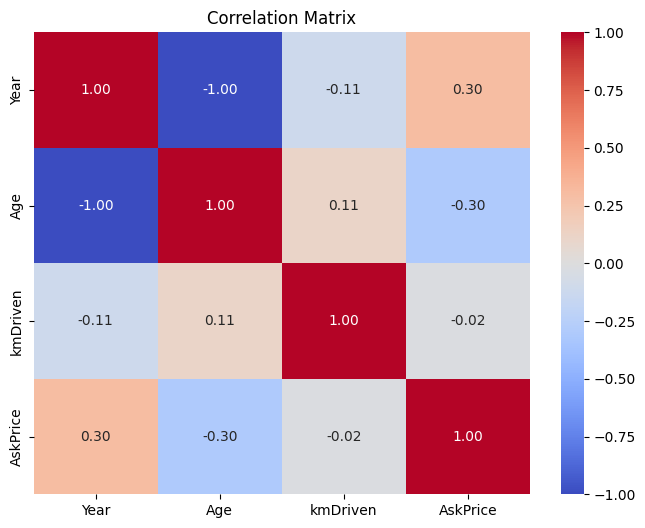

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
